In [1]:
using PyPlot

In [2]:
ns = 400
X = 2*rand(ns, 2) .- 1
Z = 1.0(((X[:, 1].-0.3).^2 .+ (X[:, 2].-0.3).^2 .< 0.3^2) .| ((X[:, 1].+0.5).^2 .+ (X[:, 2].-0.5).^2 .< 0.3^2))

inside = findall(Z.==1)
outside = findall(Z.==0);

T = zeros(ns)
T[inside] .= 1;

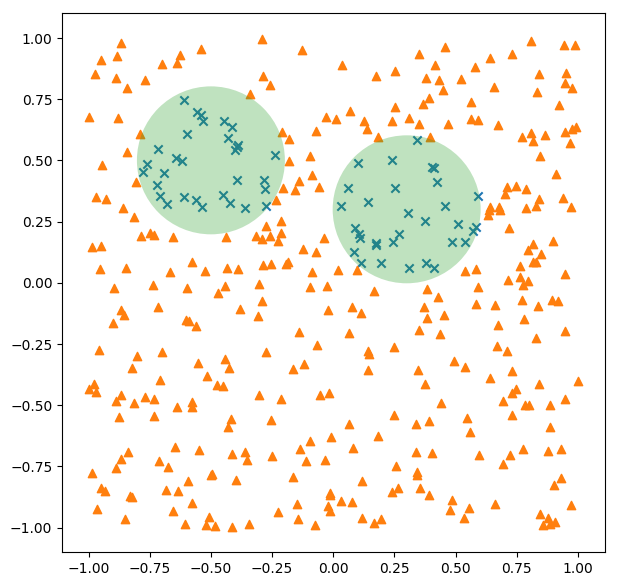

PyObject <matplotlib.collections.PathCollection object at 0x7f63580b3080>

In [3]:
figure(figsize = (7, 7))
scatter(X[inside, 1], X[inside, 2], marker = "x")
scatter(X[outside, 1], X[outside, 2], marker = "^")
scatter([0.3, -0.5], [0.3, 0.5], alpha = 0.3, edgecolors = "none", s = 11350)

In [4]:
sigmoid(z) = 1/(1+exp(-z))
tilde(array) = cat(array, ones(size(array)[1]), dims = 2)

hidden(Xtilde, weights) = sigmoid.(Xtilde * weights)
prediction(Htilde, veights) = sigmoid.(Htilde*veights)

dCdv(Htilde, P, T) = 1/length(T) * transpose(Htilde)*(P-T)

function dCdw(Xtilde, Htilde, P, T)
    ns, nh = size(Xtilde)[1], size(Htilde)[2]-1
    Deltah = zeros(ns, nh+1)
    Deltap = P .- T
    for i in 1:ns
        for j in 1:nh+1
            Deltah[i, j] = Htilde[i, j] * (1 - Htilde[i, j]) * Deltap[i] * v[j]
        end
    end
    return 1/ns * transpose(Xtilde) * Deltah
end

function cost(P, T)
    ns = length(T)
    C = -1/ns * sum(T .* log.(P) .+ (1 .- T) .* log.(1 .- P))
    return C 
end

cost (generic function with 1 method)

In [5]:
nh = 10
Xtilde = tilde(X)
w = ones(3, nh)
v = ones(nh+1)

11-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [6]:
H = hidden(Xtilde, w);
Htilde = tilde(H);

In [7]:
nu = 100
ns = 400;

In [32]:
function learn(nh, ns, nu, rate)
    C = zeros(nu)
    w = ones(3, nh)
    v = ones(nh+1)
    
    X = 2*rand(ns, 2) .- 1
    Xtilde = tilde(X)
    Z = 1.0(((X[:, 1].-0.3).^2 .+ (X[:, 2].-0.3).^2 .< 0.3^2) .| ((X[:, 1].+0.5).^2 .+ (X[:, 2].-0.5).^2 .< 0.3^2))

    inside = findall(Z.==1)
    outside = findall(Z.==0);

    T = zeros(ns)
    T[inside] .= 1;
    
    global P
    global C
    for i in 1:nu
        H = hidden(Xtilde, w)
        Htilde = tilde(H)
        P = prediction(Htilde, v)
        C[i] = cost(P, T)
        
        dw = dCdw(Xtilde, Htilde, P, T)[:, 1:10]
        dv = dCdv(Htilde, P, T)
        
        w = w - rate * dw
        v = v - rate * dv
    end
    println("dW= ", dw)
    figure()
    plot(C)
    figure(figsize = (7, 7))
    scatter(X[inside, 1], X[inside, 2], marker = "x")
    scatter(X[outside, 1], X[outside, 2], marker = "^")
    scatter([0.3, -0.5], [0.3, 0.5], alpha = 0.3, edgecolors = "none", s = 11350)
    return P, C
#     println(dw)
#     println(dv)
#     println("w = ", w)
end
        
        
        

learn (generic function with 1 method)

In [33]:
P, C = learn(10, 400, 10, 1)

UndefVarError: UndefVarError: dw not defined

In [18]:
C[10]

0.4011981827273616

In [19]:
println(dw)

UndefVarError: UndefVarError: dw not defined

In [23]:
w

3×10 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [13]:
m = -w[1] / w[2]
c = -w[3] / w[2]
plot

plot (generic function with 1 method)